In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
df = pd.read_csv("/Users/apple/Desktop/mdst_workshops/Workshop3/HospitalAdmissionsData.csv")

In [11]:
df.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [12]:
df.info()
#4 integers 
#1 float
#admission type, insurance type, religion type, race and DX are object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   58863 non-null  int64  
 1   AdmissionLengthDays  58863 non-null  float64
 2   Death_1              58863 non-null  int64  
 3   Admission_Type       58863 non-null  object 
 4   Insurance_Type       58863 non-null  object 
 5   EnglishLanguage_1    58863 non-null  int64  
 6   Religion_Type        58408 non-null  object 
 7   Married_1            58863 non-null  int64  
 8   Race                 58863 non-null  object 
 9   Dx                   58863 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [16]:
#values for insurance type
df.Insurance_Type.unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [17]:
#summary stats for admission type
df.Admission_Type.describe()

count         58863
unique            4
top       emergency
freq          41987
Name: Admission_Type, dtype: object

In [18]:
#most common admission type, insurance type, religion type, race, and DX
df.describe(include="object")

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


Text(0, 0.5, 'Counts')

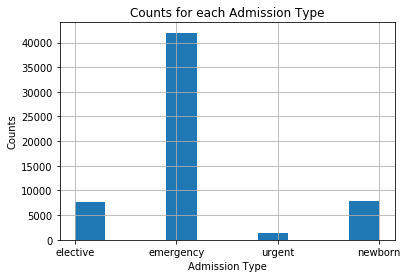

In [19]:
df.Admission_Type.hist()
plt.title("Counts for each Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts on log scale')

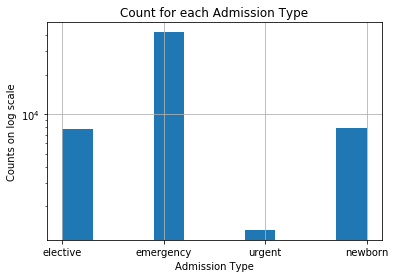

In [20]:
df.Admission_Type.hist(log=True)
plt.title("Count for each Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Counts on log scale")

In [24]:
#Compare the average length of admission
#between those who died versus those who did not die. Show a vidualization, with appropriate label, etc
df2 = df.groupby("Death_1").mean()
print()

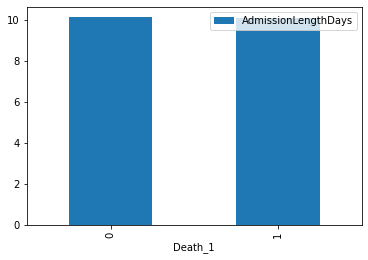

In [25]:
df2.plot.bar(y=["AdmissionLengthDays"])

In [28]:
#Describe the association between death and insurance type and show a visualization or test
crosstable = pd.crosstab(df.Death_1, df.Insurance_Type)

In [29]:
chi=stats.chi2_contingency(crosstable)
print(chi)

(990.8535593949656, 3.425615316200906e-213, 4, array([[ 1603.93780473,  5206.26864074, 25357.70733738, 20293.73076466,
          549.35545249],
       [  177.06219527,   574.73135926,  2799.29266262,  2240.26923534,
           60.64454751]]))
